## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [206]:
# Lê e carrega o arquivo para a memória
df = pd.read_csv('aptos.csv')



In [207]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [208]:
df.dropna(inplace = True)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


In [210]:
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [211]:
df.describe()

,metros,valor,quartos,vagas,reformado
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,79.383929,402.660714,2.553571,1.660714,0.517857
std,27.371072,171.723670,0.566947,0.691696,0.501927
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,253.750000,2.000000,1.000000,0.000000
50%,71.000000,348.500000,3.000000,2.000000,1.000000
75%,97.000000,515.750000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


In [212]:
print(df.groupby('bairro').size())

bairro
Assuncao            9
Baeta Neves        17
Centro             34
Demarchi            5
Ferrazopolis        4
Independencia       3
Iraja               3
Jardim do Mar       2
Jordanopolis        1
Nova Petropolis     3
Pauliceia           2
Piraporinha         1
Planalto            5
Rudge Ramos         9
Santa Teresinha     4
Taboao              4
Vila Lusitania      6
dtype: int64


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   ..:.Metros: Tamanho de cada locação 
-   ..:.Valor: Quanto dinheiro vale cada locação
-   ..:.Quartos:Quantos quartos a locação possui
-   ..:.Vagas:Quantas vagas a locação possui
-   ..:.Refomado:Se já foi reformado 
-   ..:.Bairro:Em qual bairro esta localizao 

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  ...Eu acho que o preço do imovel aumenta em relação ao tamanho dele. 
2.  ...Eu acho que a media de quartos depende do tamanho do imovel.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

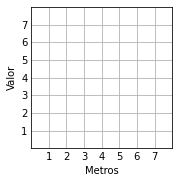

In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('_mpl-gallery')


metros = df['metros']
valor = df['valor']

fig, ax = plt.subplots()

ax.plot(metros, valor, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8),
       xlabel='Metros', ylabel='Valor')

plt.show()

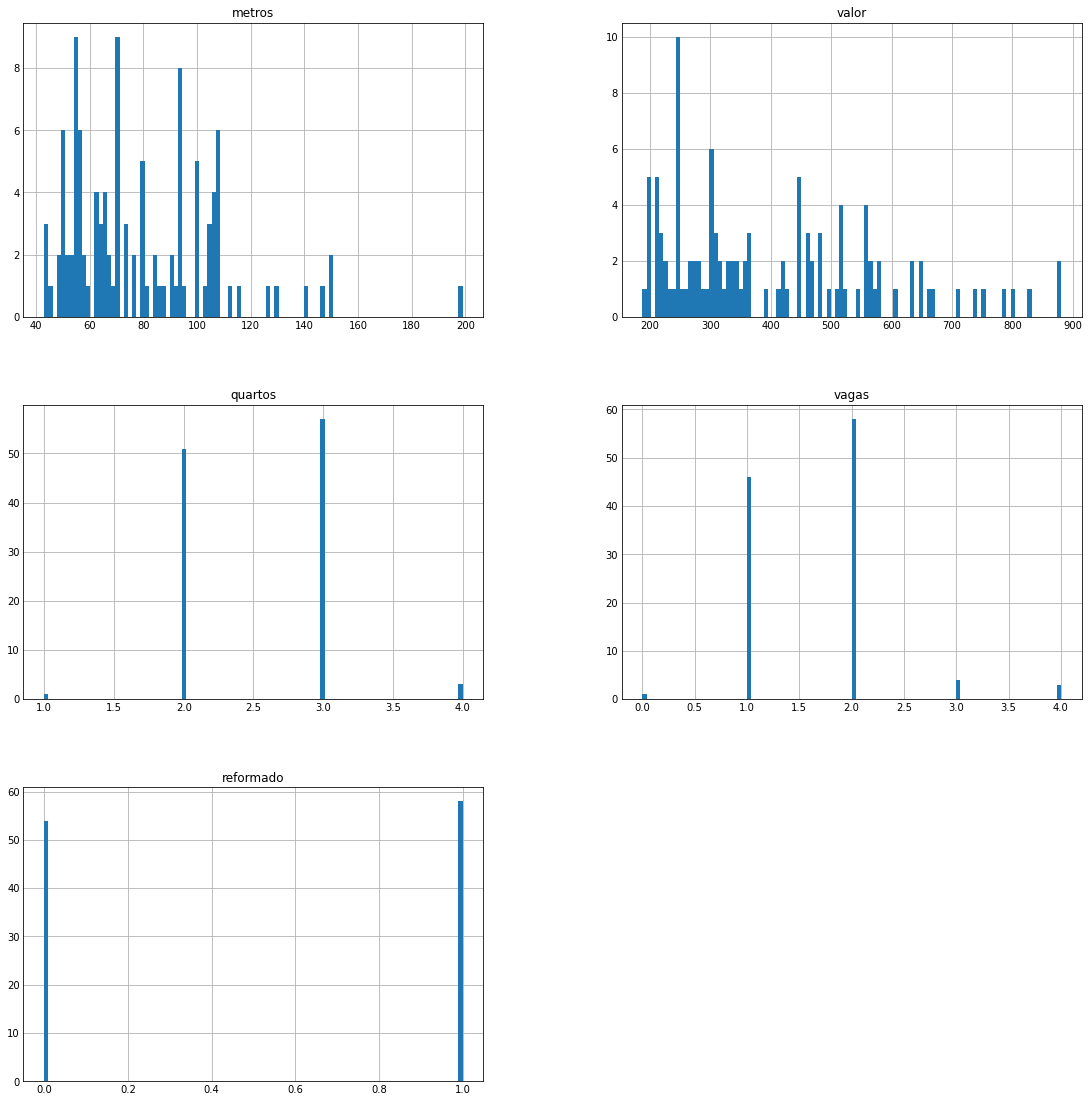

In [214]:
# Lembra de histograma, que exibe uma gráfico de frequência.
df.hist(bins=100, figsize=(15, 15))
plt.show()

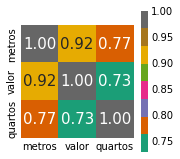

In [215]:
cols = ['metros', 'valor', 'quartos']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

Resposta: Por que o aprendizado supervisionado é uma técnica de aprendizado de máquina amplamente utilizada que permite treinar modelos para prever resultados futuros com base em dados rotulados. É útil em diversas áreas, incluindo previsão, classificação, reconhecimento de padrões, otimização e personalização. Essa técnica ajuda a melhorar a eficiência de processos e sistemas e permite a personalização de recomendações e previsões com base nos dados de um usuário.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização


Resposta: A regressão é um método estatístico usado para estimar a relação entre variáveis e prever resultados futuros. É útil para previsão e identificação de tendências, bem como para identificar a influência de uma variável sobre outra.

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo Regressão Linear
2. algoritimo Random Forests

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo Regressão Linear:Usada para prever uma variável contínua, como o preço de uma casa, com base em uma ou mais variáveis ​​independentes.
2. algoritimo Random Forests: é um modelo de aprendizado conjunto que combina várias árvores de decisão e é usado para melhorar a precisão da previsão.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [216]:
from sklearn.preprocessing import LabelEncoder

ll = LabelEncoder()
df['bairro'] = ll.fit_transform(df['bairro'])

In [217]:
from sklearn.model_selection import train_test_split
X = df.drop('valor', axis=1)
y = df['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,test_size=0.3)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 6.1 KB


In [219]:
from sklearn.linear_model import LinearRegression
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)


LinearRegression()

In [230]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred_test = modelo_1.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2_1_test = r2_score(y_test, y_pred_test)

print(f'MSE: {mse:,.2f}')
print(f'MAE: {mae:,.2f}')
print(f'R2: {r2_1_test:.2%}')

MSE: 6,136.09
MAE: 54.76
R2: 80.76%


In [223]:
y_pred_train = modelo_1.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_2_train = r2_score(y_train, y_pred_train)

print(f'MSE: {mse:,.2f}')
print(f'MAE: {mae:,.2f}')
print(f'R2: {r2_2_train:.2%}')

MSE: 3,768.01
MAE: 49.42
R2: 86.43%


### Algoritmo 2

In [224]:
from sklearn.ensemble import RandomForestRegressor
modelo_2 = RandomForestRegressor()
modelo_2.fit(X_train, y_train)

RandomForestRegressor()

In [225]:
y_pred_test = modelo_2.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2_2_test = r2_score(y_test, y_pred_test)

print(f'MSE: {mse:,.2f}')
print(f'MAE: {mae:,.2f}')
print(f'R2: {r2_2_test:.2%}')

MSE: 8,493.44
MAE: 61.62
R2: 73.37%


In [226]:
y_pred_train = modelo_2.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_2_train = r2_score(y_train, y_pred_train)

print(f'MSE: {mse:,.2f}')
print(f'MAE: {mae:,.2f}')
print(f'R2: {r2_2_train:.2%}')

MSE: 766.31
MAE: 20.76
R2: 97.24%


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

In [231]:
result_r2 = pd.DataFrame({'algoritmo1': [f'{r2_1_test:.2%}', f'{r2_2_train:.2%}'],
                          'algoritmo2': [f'{r2_2_test:.2%}', f'{r2_2_train:.2%}']},
                         index=['Teste', 'Treino'])

display(result_r2)

,algoritmo1,algoritmo2
Teste,80.76%,73.37%
Treino,97.24%,97.24%


**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** o algaritmo 1 pois teve uma maior eficacia, mesmo tendo o mesmo treino 


## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [234]:
df.columns


Index(['metros', 'valor', 'quartos', 'vagas', 'reformado', 'bairro'], dtype='object')

In [237]:
modelo_1.predict([[72,2,2,1,2]])

print(f'O apartamento custa R${modelo_1.predict([[72,2,2,1,2]])[0]}')

O apartamento custa R$365.5589703511504


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:O modelo teve um resultado acima da media, mais não fiquei satisfeito com o resultado 

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:Eu tentaria utilizar outros algaritmos ate encontrar o melhor possivel, com o melhor resultado 




